# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [2]:
# Importing the MNIST Dataset

df = pd.read_csv('./Digit Recognizer Datasets/train.csv')
print(df.shape, df.columns, sep='\n\n')

(42000, 785)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [3]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Generating numpy arrays of the DataFrame

data = df.values
print(data.shape, type(data), data, sep='\n\n')

(42000, 785)

<class 'numpy.ndarray'>

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [5]:
# Differentiating Features and Labels from the numpy array to 2 different arrays

X = data[:,1:]
Y = data[:,0]

print(X.shape, X, Y.shape, Y, sep='\n\n')

(42000, 784)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

(42000,)

[1 0 1 ... 7 6 9]


In [6]:
# Spliting the Data in 2:8 ratio of the whole data
# 8 parts for the training data and 2 parts for the testing data

split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split, :]
Y_train = Y[:split]

X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, X_train, Y_train.shape, Y_train, sep='\n\n')
print(X_test.shape, X_test, Y_test.shape, Y_test, sep='\n\n')

33600
(33600, 784)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

(33600,)

[1 0 1 ... 0 2 2]
(8400, 784)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

(8400,)

[0 7 7 ... 7 6 9]


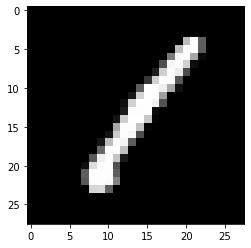

Actual Value :  1


In [7]:
#Visualising a Samples

def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()
    
drawImg(X_train[0])
print('Actual Value : ', Y_train[0])
    
    

### Step 2. Implementing KNN Algorithm

In [8]:
# dist() : function to calculate the distance between two numpy arrays (here, x1 and x2) - Euclidean distance

def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [9]:
# KNN Algorithm

def knn(X, Y, queryPoint, k=5):
    
    # Find out the K nearest neighbours
    vals = []
    m = X.shape[0]
    
    # 1st for each point in the X calculating the distance and put it and its class (0 or 1) into vals
    for i in range(m):
        d = dist(queryPoint, X[i])     # computing the distance
        vals.append((d, Y[i]))
    
    # Sorting the list according to the distances
    vals = sorted(vals)
    
    # Nearest/First K points
    vals = vals[:k]                 
    
    # Creating numpy array of the nearest K points
    vals = np.array(vals)
    
    # For Majority Vote {major no. of points class (0 or 1)}
    # We are using unique; here, it will create an array with unique values from an array. And, return_counts=True
    # will gives the count of each value {the whole statement will create an array containing 2 arrays}
    
    new_vals = np.unique(vals[:, 1], return_counts=True)
    
    # new_vals[1] will give the 2nd array inside new_vals array i.e., the count array
    # And argmax() will give the index of the maximum count
    index = new_vals[1].argmax()
    pred = new_vals[0][index]        # We are mapping the value {In unique values array} with the index of max count value
    
    return pred

### Step 3 : Make Predictions 

In [10]:
# Making Some Predictions on some data : X_test

pred = []
for i in range(10):
    pred.append(knn(X_train, Y_train, X_test[i]))
    print(int(pred[i]))


0
7
7
2
2
6
5
7
5
5


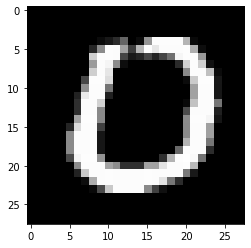

Actual :  0 Prediction :  0





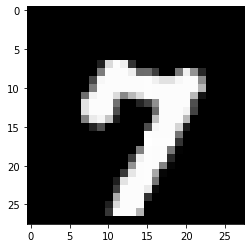

Actual :  7 Prediction :  7





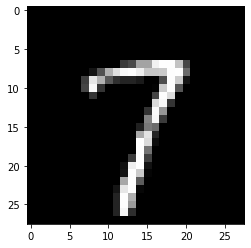

Actual :  7 Prediction :  7





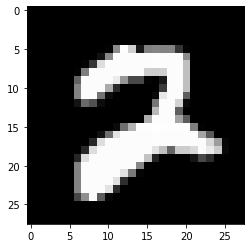

Actual :  2 Prediction :  2





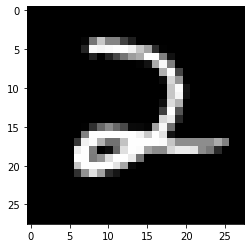

Actual :  2 Prediction :  2





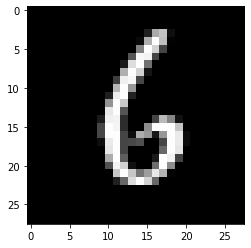

Actual :  6 Prediction :  6





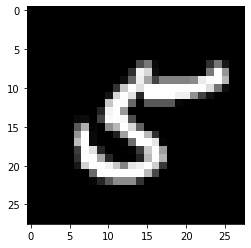

Actual :  5 Prediction :  5





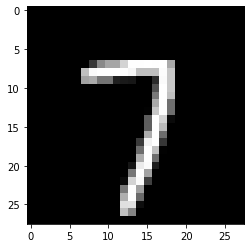

Actual :  7 Prediction :  7





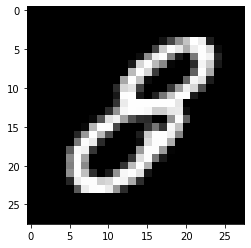

Actual :  8 Prediction :  5





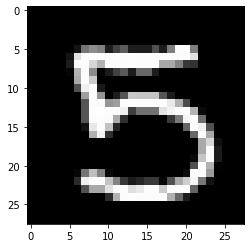

Actual :  5 Prediction :  5





In [11]:
# Visualising the Predictions that is done above with Actual results in Y_test

for i in range(10):
    drawImg(X_test[i])
    print('Actual : ', Y_test[i], 'Prediction : ', int(pred[i]))
    print('\n\n')

### Accuracy of the Algorithm for the test dataset

In [12]:
# get_acc() : Accuracy function to get the accuracy of the predictions {It takes toooooo much time for large dataset}

def get_acc(X_train, Y_train, X_test, Y_test):
    
    y_pred = []
    
    for i in range(Y_test.shape[0]):
        p = knn(X_train, Y_train, X_test[i])
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred == Y_test).sum())/Y_test.shape[0]

In [13]:
print('Accuracy :', get_acc(X_train, Y_train, X_test, Y_test)*100.0, '%')

Accuracy : 95.0 %
